<a href="https://colab.research.google.com/github/mkndiaye/Portfolio/blob/main/Inverted_Pendulum_using_q_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Q-learning algorithm implemented for an inverted pendulum:

In [ ]:
import gym
import numpy as np
import random
import math
import matplotlib.pyplot as plt
import seaborn as sns

# Initialize the CartPole environment
env = gym.make('CartPole-v1') # you are importing a model of inverted pendulum

# Q-learning parameters
alpha = 0.1  # Learning rate
gamma = 0.99  # Discount factor
epsilon = 1.0  # Exploration rate
epsilon_min = 0.01
epsilon_decay = 0.995
num_episodes = 1000
max_steps = 200

# Discretize the state space
num_buckets = (1, 1, 6, 12)  # Number of discrete bins for each state dimension
state_bounds = list(zip(env.observation_space.low, env.observation_space.high))
state_bounds[1] = [-0.5, 0.5]
state_bounds[3] = [-math.radians(50), math.radians(50)]

# Initialize Q-table
q_table = np.zeros(num_buckets + (env.action_space.n,))

def discretize_state(state):
    """Discretize the continuous state into discrete buckets."""
    ratios = [(state[i] + abs(state_bounds[i][0])) / (state_bounds[i][1] - state_bounds[i][0]) for i in range(len(state))]
    new_state = [int(round((num_buckets[i] - 1) * ratios[i])) for i in range(len(state))]
    new_state = [min(num_buckets[i] - 1, max(0, new_state[i])) for i in range(len(state))]
    return tuple(new_state)

def choose_action(state):
    """Choose an action based on the epsilon-greedy policy."""
    if random.uniform(0, 0.9) < epsilon:
        return env.action_space.sample()  # Explore
    else:
        return np.argmax(q_table[state])  # Exploit

def update_q_table(state, action, reward, next_state):
    """Update the Q-value for the given state-action pair."""
    best_next_action = np.argmax(q_table[next_state])
    td_target = reward + gamma * q_table[next_state][best_next_action]
    td_error = td_target - q_table[state][action]
    q_table[state][action] += alpha * td_error

# Training the agent
for episode in range(num_episodes):
    state = discretize_state(env.reset())
    total_reward = 0

    for step in range(max_steps):
        action = choose_action(state)
        next_state, reward, done, _ = env.step(action)
        next_state = discretize_state(next_state)
        update_q_table(state, action, reward, next_state)
        state = next_state
        total_reward += reward

        if done:
            break

    # Decay epsilon
    if epsilon > epsilon_min:
        epsilon *= epsilon_decay

    print(f"Episode {episode + 1}: Total Reward: {total_reward}")

# Evaluate the trained policy
state = discretize_state(env.reset())
total_reward = 0

for step in range(max_steps):
    env.render()
    action = np.argmax(q_table[state])
    next_state, reward, done, _ = env.step(action)
    next_state = discretize_state(next_state)
    state = next_state
    total_reward += reward

    if done:
        break

env.close()
print(f"Total Reward during evaluation: {total_reward}")


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/gym/core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.10/dist-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.10/dist-packages/gym

Episode 1: Total Reward: 38.0
Episode 2: Total Reward: 15.0
Episode 3: Total Reward: 18.0
Episode 4: Total Reward: 11.0
Episode 5: Total Reward: 16.0
Episode 6: Total Reward: 15.0
Episode 7: Total Reward: 23.0
Episode 8: Total Reward: 19.0
Episode 9: Total Reward: 23.0
Episode 10: Total Reward: 23.0
Episode 11: Total Reward: 15.0
Episode 12: Total Reward: 12.0
Episode 13: Total Reward: 17.0
Episode 14: Total Reward: 15.0
Episode 15: Total Reward: 28.0
Episode 16: Total Reward: 11.0
Episode 17: Total Reward: 10.0
Episode 18: Total Reward: 55.0
Episode 19: Total Reward: 42.0
Episode 20: Total Reward: 41.0
Episode 21: Total Reward: 20.0
Episode 22: Total Reward: 13.0
Episode 23: Total Reward: 12.0
Episode 24: Total Reward: 47.0
Episode 25: Total Reward: 10.0
Episode 26: Total Reward: 14.0
Episode 27: Total Reward: 11.0
Episode 28: Total Reward: 16.0
Episode 29: Total Reward: 10.0
Episode 30: Total Reward: 18.0
Episode 31: Total Reward: 11.0
Episode 32: Total Reward: 16.0
Episode 33: Total

/usr/local/lib/python3.10/dist-packages/gym/core.py:49: DeprecationWarning: WARN: You are calling render method, but you didn't specified the argument render_mode at environment initialization. To maintain backward compatibility, the environment will render in human mode.
If you want to render in human mode, initialize the environment in this way: gym.make('EnvName', render_mode='human') and don't call the render method.
See here for more information: https://www.gymlibrary.ml/content/api/
  deprecation(


Total Reward during evaluation: 17.0


Psuedocode for a possible idea on the agent navigating two different forms:


In [ ]:
#Initialize:
    Q_table[state][action][form] = 0 for all state-action-form combinations
    start_point = A
    end_point = B
    forms = [VERTICAL, HORIZONTAL]
    epsilon = 1.0  // Exploration rate
    alpha = 0.1    // Learning rate
    gamma = 0.9    // Discount factor
    max_episodes = 1000

Function get_possible_actions(state, form):
    if form == VERTICAL:
        return [MOVE_UP, MOVE_DOWN, SWITCH_FORM]
    else:  // HORIZONTAL
        return [MOVE_LEFT, MOVE_RIGHT, SWITCH_FORM]

Function choose_action(state, form):
    if random() < epsilon:
        return random_choice(get_possible_actions(state, form))
    else:
        return argmax(Q_table[state][action][form] for action in get_possible_actions(state, form))

Function get_next_state(state, action, form):
    if action == SWITCH_FORM:
        return state, opposite(form)
    else:
        return new_state_after_move(state, action), form

Function q_learning():
    For episode = 1 to max_episodes:
        state = start_point
        form = random_choice(forms)

        While state != end_point:
            action = choose_action(state, form)
            next_state, next_form = get_next_state(state, action, form)
            reward = calculate_reward(state, next_state, end_point)

            best_next_q = max(Q_table[next_state][a][next_form] for a in get_possible_actions(next_state, next_form))

            Q_table[state][action][form] += alpha * (reward + gamma * best_next_q - Q_table[state][action][form])

            state = next_state
            form = next_form

        epsilon *= 0.99  // Decay exploration rate

    return Q_table

Function find_optimal_path():
    Q_table = q_learning()
    path = []
    state = start_point
    form = argmax(max(Q_table[start_point][a][f] for a in get_possible_actions(start_point, f)) for f in forms)

    While state != end_point:
        action = argmax(Q_table[state][a][form] for a in get_possible_actions(state, form))
        path.append((state, action, form))
        state, form = get_next_state(state, action, form)

    return path

optimal_path = find_optimal_path()
print(optimal_path)


SyntaxError: invalid syntax (<ipython-input-1-aace0c8fd509>, line 1)

1) Initialize the Q-table with three dimensions: state, action, and form.

2) The get_possible_actions function returns different action sets based on the current form.

3) The choose_action function implements an epsilon-greedy strategy for exploration vs. exploitation.

4) The get_next_state function handles both movement actions and form switching.

5) The q_learning function implements the core Q-learning algorithm, updating Q-values based on rewards and future estimated values.

6) The find_optimal_path function uses the learned Q-table to construct the optimal path from start to end.

7) The algorithm considers form switching as part of the action space, allowing the agent to optimize its movement by changing forms when beneficial.

8)The reward function (not fully implemented in the pseudocode) should encourage reaching the goal and possibly incentivize efficient use of the two forms.

In [ ]:
import numpy as np
import random

class ReconfigurableRoomEnvironment:
    def __init__(self, width, height):
        self.width = width
        self.height = height
        self.state_space = width * height
        self.action_space = 6  # up, down, left, right, reconfigure, rotate
        self.configurations = ['normal', 'slim']
        self.orientations = ['vertical', 'horizontal']
        self.reset()

    def reset(self):
        self.position = (0, 0)
        self.configuration = 'normal'
        self.orientation = 'vertical'
        self.visited = np.zeros((self.width, self.height))
        self.visited[self.position] = 1
        return self.get_state()

    def step(self, action):
        x, y = self.position
        if action == 0 and x > 0:  # up
            x -= 1
        elif action == 1 and x < self.width - 1:  # down
            x += 1
        elif action == 2 and y > 0:  # left
            y -= 1
        elif action == 3 and y < self.height - 1:  # right
            y += 1
        elif action == 4:  # reconfigure
            self.configuration = 'slim' if self.configuration == 'normal' else 'normal'
        elif action == 5:  # rotate
            self.orientation = 'horizontal' if self.orientation == 'vertical' else 'vertical'

        self.position = (x, y)
        reward = self.calculate_reward()
        self.visited[x, y] = 1
        done = np.all(self.visited == 1)
        return self.get_state(), reward, done

    def calculate_reward(self):
        if self.visited[self.position] == 0:
            if self.configuration == 'slim':
                return 2  # Higher reward for covering new area while in slim configuration
            else:
                return 1
        else:
            return -1

    def get_state(self):
        return (*self.position, self.configurations.index(self.configuration), self.orientations.index(self.orientation))

def q_learning(env, episodes, alpha, gamma, epsilon, epsilon_decay):
    q_table = np.zeros((env.width, env.height, len(env.configurations), len(env.orientations), env.action_space))
    experience_buffer = []

    for episode in range(episodes):
        state = env.reset()
        done = False
        while not done:
            if random.uniform(0, 1) < epsilon:
                action = random.randint(0, env.action_space - 1)
            else:
                action = np.argmax(q_table[state])

            next_state, reward, done = env.step(action)
            experience_buffer.append((state, action, reward, next_state, done))

            # Update Q-table
            old_value = q_table[state + (action,)]
            next_max = np.max(q_table[next_state])
            new_value = (1 - alpha) * old_value + alpha * (reward + gamma * next_max)
            q_table[state + (action,)] = new_value

            state = next_state

            # Experience replay
            if len(experience_buffer) > 1000:
                experience_buffer.pop(0)
            if len(experience_buffer) >= 32:
                batch = random.sample(experience_buffer, 32)
                for s, a, r, next_s, d in batch:
                    q_table[s + (a,)] = (1 - alpha) * q_table[s + (a,)] + alpha * (r + gamma * np.max(q_table[next_s]) * (1 - d))

        epsilon = max(epsilon * epsilon_decay, 0.01)

    return q_table

def find_optimal_path(env, q_table):
    state = env.reset()
    path = [state]
    done = False
    while not done:
        action = np.argmax(q_table[state])
        next_state, _, done = env.step(action)
        path.append(next_state)
        state = next_state
    return path

# Parameters
width, height = 5, 5
env = ReconfigurableRoomEnvironment(width, height)
episodes = 5000
alpha = 0.1
gamma = 0.9
epsilon = 1.0
epsilon_decay = 0.995

# Train the agent
q_table = q_learning(env, episodes, alpha, gamma, epsilon, epsilon_decay)

# Find and display the optimal path
optimal_path = find_optimal_path(env, q_table)
print("Optimal path to cover the room:")
for state in optimal_path:
    x, y, config, orient = state
    print(f"Position: ({x}, {y}), Configuration: {env.configurations[config]}, Orientation: {env.orientations[orient]}")


Expanded Action Space: The action space now includes 6 actions: up, down, left, right, reconfigure, and rotate.

Reconfigurable Agent: The agent can switch between 'normal' and 'slim' configurations, allowing it to adapt to tighter spaces.
Orientation: The agent can rotate between 'vertical' and 'horizontal' orientations, similar to the reconfiguration action.

State Representation: The state now includes the agent's position, configuration, and orientation.

Reward Function: The reward function has been modified to give a higher reward for covering new areas while in the 'slim' configuration, encouraging the agent to use this ability in tighter spaces.

Experience Replay: An experience buffer has been added to store and replay past experiences, which can help improve learning in dynamic environments.

Q-table: The Q-table dimensions have been expanded to account for the new state representation, including configuration and orientation.

/usr/local/lib/python3.10/dist-packages/gym/core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.10/dist-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.10/dist-packages/gym/utils/passive_env_checker.py:241: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):


Episode 1: Total Reward: 16.0
Episode 2: Total Reward: 36.0
Episode 3: Total Reward: 28.0
Episode 4: Total Reward: 16.0
Episode 5: Total Reward: 39.0
Episode 6: Total Reward: 14.0
Episode 7: Total Reward: 11.0
Episode 8: Total Reward: 33.0
Episode 9: Total Reward: 24.0
Episode 10: Total Reward: 23.0
Episode 11: Total Reward: 26.0
Episode 12: Total Reward: 14.0
Episode 13: Total Reward: 15.0
Episode 14: Total Reward: 12.0
Episode 15: Total Reward: 32.0
Episode 16: Total Reward: 32.0
Episode 17: Total Reward: 28.0
Episode 18: Total Reward: 12.0
Episode 19: Total Reward: 18.0
Episode 20: Total Reward: 17.0
Episode 21: Total Reward: 11.0
Episode 22: Total Reward: 12.0
Episode 23: Total Reward: 10.0
Episode 24: Total Reward: 16.0
Episode 25: Total Reward: 11.0
Episode 26: Total Reward: 12.0
Episode 27: Total Reward: 29.0
Episode 28: Total Reward: 18.0
Episode 29: Total Reward: 15.0
Episode 30: Total Reward: 11.0
Episode 31: Total Reward: 14.0
Episode 32: Total Reward: 25.0
Episode 33: Total

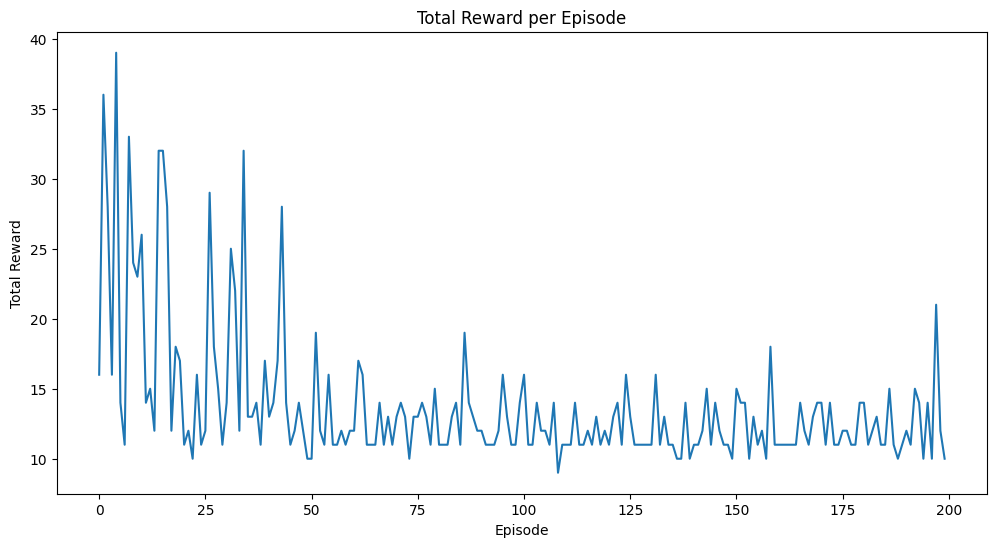

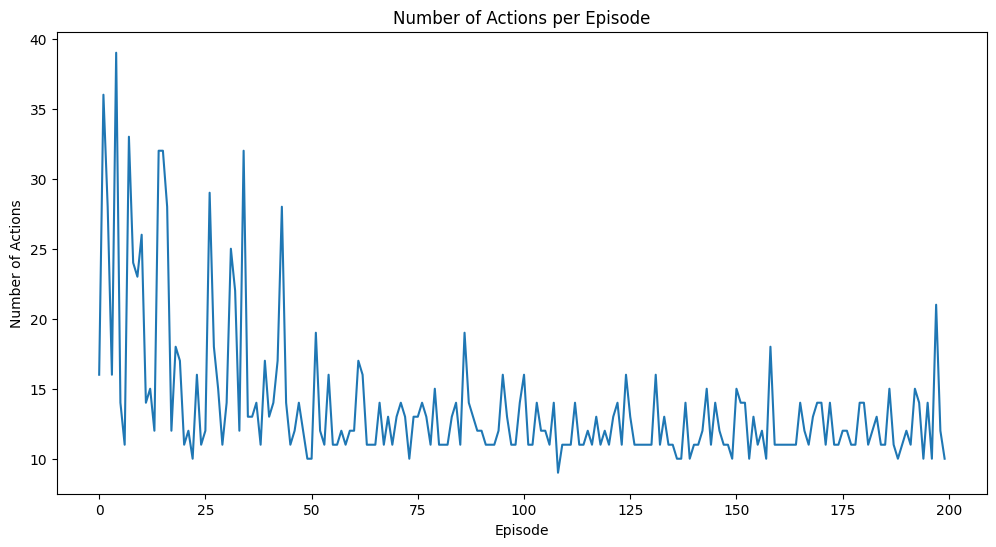

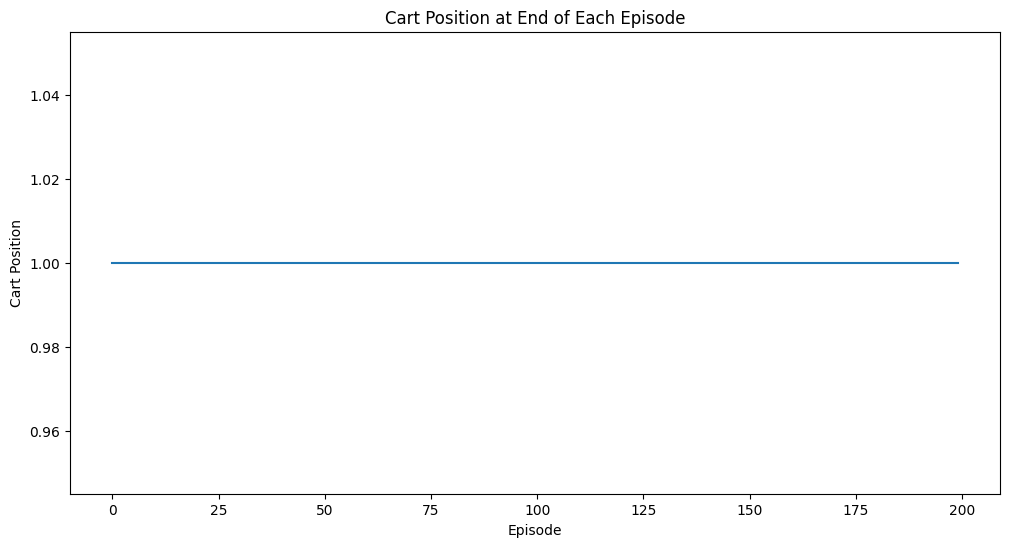

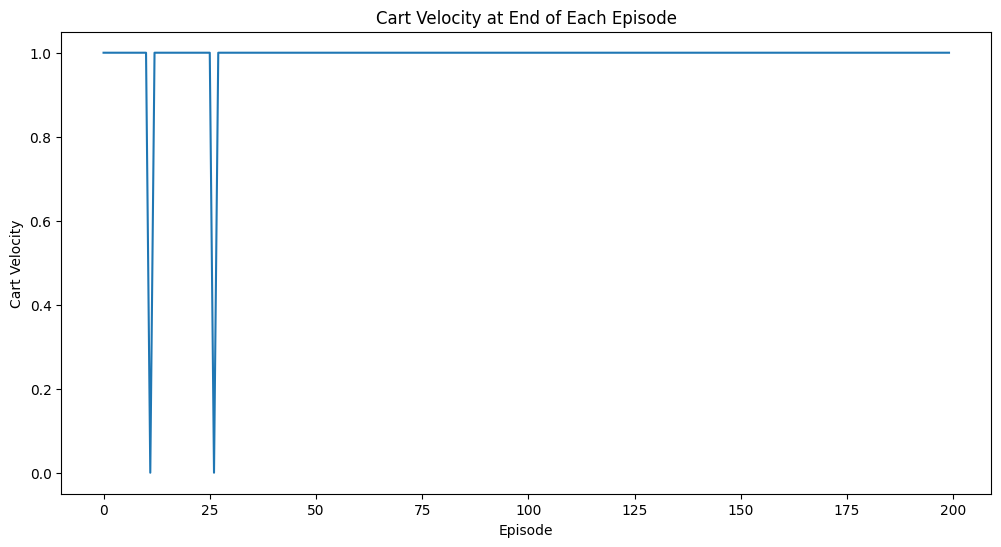

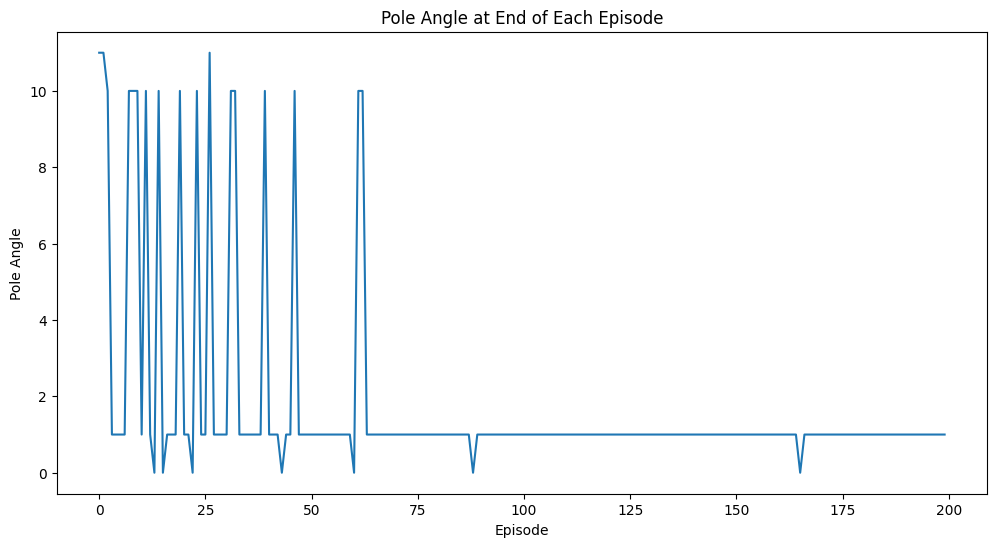

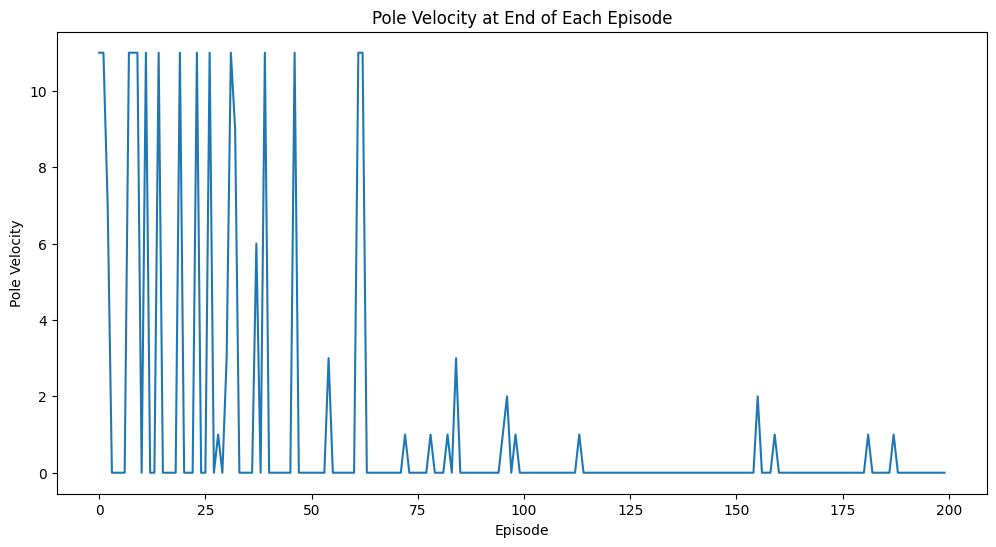

/usr/local/lib/python3.10/dist-packages/gym/core.py:49: DeprecationWarning: WARN: You are calling render method, but you didn't specified the argument render_mode at environment initialization. To maintain backward compatibility, the environment will render in human mode.
If you want to render in human mode, initialize the environment in this way: gym.make('EnvName', render_mode='human') and don't call the render method.
See here for more information: https://www.gymlibrary.ml/content/api/
  deprecation(


Total Reward during evaluation: 11.0


In [ ]:
import gym
import numpy as np
import random
import math
import matplotlib.pyplot as plt
import seaborn as sns

# Initialize the CartPole environment from OpenAI Gym
env = gym.make('CartPole-v1')

# Q-learning parameters
alpha = 0.1     # Learning rate: how much we adjust Q-values in each update
gamma = 0.99    # Discount factor: how much we value future rewards (0 = not at all, 1 = equally to current reward)
epsilon = 1     # Exploration rate: initial probability of choosing a random action
epsilon_min = 0.01  # Minimum exploration rate (epsilon will decay towards this)
epsilon_decay = 0.95 # Rate at which epsilon decreases after each episode
num_episodes = 200   # Total number of episodes (rounds) for training
max_steps = 200      # Maximum steps allowed per episode

# State Discretization Parameters:
# - Increased number of buckets (bins) to represent each state dimension
#   - This provides a finer-grained representation, potentially improving learning
num_buckets = (3, 3, 12, 12)
state_bounds = list(zip(env.observation_space.low, env.observation_space.high))

# Adjust some state bounds for finer control over discretization:
state_bounds[0] = [-2.4, 2.4]   # Cart Position (original bounds were smaller)
state_bounds[1] = [-3.0, 3.0]   # Cart Velocity (slightly increased)
state_bounds[2] = [-math.radians(15), math.radians(15)]  # Pole Angle (narrowed)
state_bounds[3] = [-math.radians(50), math.radians(50)]  # Pole Velocity

# Create the Q-table:
# - Each state is represented by a tuple of discrete values
# - Each action is represented by an integer (0 or 1 for CartPole)
q_table = np.zeros(num_buckets + (env.action_space.n,))

# Function to convert continuous state values to discrete bucket indices
def discretize_state(state):
    """
    Discretize the continuous state values into their corresponding bucket indices.
    1. Calculate ratios for each state dimension, representing how far the value is
       between the lower and upper bound of its dimension.
    2. Scale and round the ratios to get bucket indices.
    3. Ensure indices are within valid bounds (0 to num_buckets - 1).
    """
    ratios = [(state[i] + abs(state_bounds[i][0])) / (state_bounds[i][1] - state_bounds[i][0]) for i in range(len(state))]
    new_state = [int(round((num_buckets[i] - 1) * ratios[i])) for i in range(len(state))]
    new_state = [min(num_buckets[i] - 1, max(0, new_state[i])) for i in range(len(state))]
    return tuple(new_state)

# Function to choose an action using the epsilon-greedy policy
def choose_action(state):
    """
    Epsilon-greedy action selection:
    - With probability epsilon, choose a random action (exploration)
    - Otherwise, choose the action with the highest Q-value in the Q-table for the
      current state (exploitation)
    """
    if random.uniform(0, 0.9) < epsilon:  # Use 0.9 instead of 1 to bias slightly towards exploration
        return env.action_space.sample()
    else:
        return np.argmax(q_table[state])

# Function to update the Q-value in the table
def update_q_table(state, action, reward, next_state):
    """
    Q-learning update rule:
    1. Get the best action for the next state.
    2. Calculate the Temporal Difference (TD) target:
       - Immediate reward + discounted value of the next state's best action
    3. Calculate the TD error:
       - Difference between the TD target and the current Q-value
    4. Update the Q-value by a fraction (alpha) of the TD error
    """
    best_next_action = np.argmax(q_table[next_state])
    shaped_reward = reward + (1 - abs(state[3]))  # Reward shaped to favor pole closer to vertical
    td_target = shaped_reward + gamma * q_table[next_state][best_next_action]
    td_error = td_target - q_table[state][action]
    q_table[state][action] += alpha * td_error


# Lists to store episode rewards, actions, states, and end states
episode_rewards = []
actions_per_episode = []
states_per_episode = []
end_states = []


# Q-Learning Training Loop
for episode in range(num_episodes):
    state = discretize_state(env.reset())  # Get initial state and discretize
    total_reward = 0
    episode_actions = []
    episode_states = []

    for step in range(max_steps):
        action = choose_action(state)        # Choose action based on epsilon-greedy policy
        next_state, reward, done, _ = env.step(action)  # Take action, get next state, reward, and if done
        next_state = discretize_state(next_state)     # Discretize next state
        update_q_table(state, action, reward, next_state)  # Update Q-table
        state = next_state                                 # Update current state
        total_reward += reward                           # Accumulate reward

        # Store data for plotting
        episode_actions.append(action)
        episode_states.append(state)

        if done:  # Episode terminates if done (pole falls or cart goes out of bounds)
            break

    # After each episode:
    episode_rewards.append(total_reward)
    actions_per_episode.append(episode_actions)
    states_per_episode.append(episode_states)
    end_states.append(state)
    # Decay epsilon
    if epsilon > epsilon_min:
        epsilon *= epsilon_decay

    print(f"Episode {episode + 1}: Total Reward: {total_reward}")


# Plotting total rewards per episode
plt.figure(figsize=(12, 6))
plt.plot(episode_rewards)
plt.xlabel('Episode')
plt.ylabel('Total Reward')
plt.title('Total Reward per Episode')
plt.show()

# Plotting the number of actions taken per episode
plt.figure(figsize=(12, 6))
plt.plot([len(actions) for actions in actions_per_episode])
plt.xlabel('Episode')
plt.ylabel('Number of Actions')
plt.title('Number of Actions per Episode')
plt.show()

# Plotting the final state values (cart position, cart velocity, pole angle, pole velocity) for each episode
state_labels = ['Cart Position', 'Cart Velocity', 'Pole Angle', 'Pole Velocity']
for i, label in enumerate(state_labels):
    plt.figure(figsize=(12, 6))
    plt.plot([state[i] for state in end_states])
    plt.xlabel('Episode')
    plt.ylabel(label)
    plt.title(f'{label} at End of Each Episode')
    plt.show()


# Evaluate the trained policy
state = discretize_state(env.reset())
total_reward = 0

for step in range(max_steps):
    env.render()  # Render the environment
    action = np.argmax(q_table[state])  # Choose the best action
    next_state, reward, done, _ = env.step(action)
    next_state = discretize_state(next_state)
    state = next_state
    total_reward += reward

    if done:
        break

env.close()
print(f"Total Reward during evaluation: {total_reward}")

